In [1]:
from methods import *
import os, shutil

In [4]:
dataset_folder = "tsne"
word2vec_len = 300

word2vec_pickle = dataset_folder + '/word2vec.p'

In [5]:
"""
output_file_weda = "tsne" + '/train_weda.txt'
train_orig = "tsne/train_orig.txt"
gen_standard_aug_weda(train_orig, output_file_weda, num_aug=9)
"""

'\noutput_file_weda = "tsne" + \'/train_weda.txt\'\ntrain_orig = "tsne/train_orig.txt"\ngen_standard_aug_weda(train_orig, output_file_weda, num_aug=9)\n'

In [6]:
"""
huge_word2vec = 'word2vec/glove.840B.300d.txt'

gen_vocab_dicts(dataset_folder, word2vec_pickle, huge_word2vec)
"""


"\nhuge_word2vec = 'word2vec/glove.840B.300d.txt'\n\ngen_vocab_dicts(dataset_folder, word2vec_pickle, huge_word2vec)\n"

In [7]:
def run_cnn_tsne(train_file, test_file, num_classes, input_size, percent_dataset):
    word2vec_pickle = "tsne" + '/word2vec.p'
    word2vec = load_pickle(word2vec_pickle)
        
    #initialize model
    model = build_cnn(input_size, word2vec_len, num_classes)

    #load data
    train_x, train_y = get_x_y(train_file, num_classes, word2vec_len, input_size, word2vec, percent_dataset)
    test_x, test_y = get_x_y(test_file, num_classes, word2vec_len, input_size, word2vec, 1)

    #implement early stopping
    callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

    #train model
    model.fit(	train_x, 
                train_y, 
                epochs=100, 
                callbacks=callbacks,
                validation_split=0.1, 
                batch_size=1024, 
                shuffle=True, 
                verbose=1)
    #model.save('checkpoints/lol')
    #model = load_model('checkpoints/lol')

    #evaluate model
    y_pred = model.predict(test_x)
    test_y_cat = one_hot_to_categorical(test_y)
    y_pred_cat = one_hot_to_categorical(y_pred)
    acc = accuracy_score(test_y_cat, y_pred_cat)

    #clean memory???
    train_x, train_y = None, None
    gc.collect()

    #return the accuracy
    #print("data with shape:", train_x.shape, train_y.shape, 'train=', train_file, 'test=', test_file, 'with fraction', percent_dataset, 'had acc', acc)
    return acc, model



In [8]:
#for storing last layer representations
last_layer_cnn_no_aug = []
last_layer_cnn_aug = []


#initialize all the variables

num_classes = 2
input_size = 50
word2vec_pickle = dataset_folder + '/word2vec.p'
word2vec = load_pickle(word2vec_pickle)

train_path = 'tsne/train_orig.txt'
test_path = 'tsne/test.txt'
acc, model = run_cnn_tsne(train_path, test_path, num_classes, input_size, percent_dataset=1)
print("cnn", acc)   
model.pop()

Epoch 1/100
7/7 [==============================] - 2s 194ms/step - loss: 0.6791 - accuracy: 0.5820 - val_loss: 0.6350 - val_accuracy: 0.6824
Epoch 2/100
7/7 [==============================] - 1s 161ms/step - loss: 0.6002 - accuracy: 0.7377 - val_loss: 0.5638 - val_accuracy: 0.7324
Epoch 3/100
7/7 [==============================] - 1s 169ms/step - loss: 0.5083 - accuracy: 0.7857 - val_loss: 0.5013 - val_accuracy: 0.7649
Epoch 4/100
7/7 [==============================] - 1s 161ms/step - loss: 0.4306 - accuracy: 0.8128 - val_loss: 0.4622 - val_accuracy: 0.7797
Epoch 5/100
7/7 [==============================] - 1s 167ms/step - loss: 0.3747 - accuracy: 0.8355 - val_loss: 0.4519 - val_accuracy: 0.7811
Epoch 6/100
7/7 [==============================] - 1s 161ms/step - loss: 0.3391 - accuracy: 0.8500 - val_loss: 0.4425 - val_accuracy: 0.7905
Epoch 7/100
7/7 [==============================] - 1s 164ms/step - loss: 0.3029 - accuracy: 0.8740 - val_loss: 0.4365 - val_accuracy: 0.7892
Epoch 8/100
7

In [9]:
#load data
output_file_weda = "tsne/train_weda.txt"
test_orig = "tsne/test.txt"
orig_x, orig_y = get_x_y(test_orig, num_classes, word2vec_len, input_size, word2vec, 1)
aug_x, aug_y = get_x_y(output_file_weda, num_classes, word2vec_len, input_size, word2vec, 1)


output_orig_x = model(orig_x)
output_aug_x = model(aug_x)


In [10]:
print(output_orig_x.shape)

(1749, 20)


In [11]:
output_orig_x = np.array(output_orig_x)

## Test alone

In [12]:
# do tsne on output orig_x + plot
print(output_orig_x.shape)
from sklearn.manifold import TSNE

nb_points = 30
print(orig_y.shape)
pos_idx = np.where(orig_y[:,0] == 1)[0][:nb_points]
neg_idx = np.where(orig_y[:,0] == 0)[0][:nb_points]
print(np.where(orig_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_orig_x_reduced = []
for idx in idx_reduced:
    output_orig_x_reduced.append(output_orig_x[idx])
    
output_orig_x_reduced = np.array(output_orig_x_reduced)

print(output_orig_x_reduced.shape)

tsne = TSNE(n_components=2, init='random')
orig_tsne =  tsne.fit_transform(output_orig_x_reduced)



(1749, 20)
(1749, 2)
[   0    1    2 ... 1746 1747 1748]
[ 2  3  4  5  6  8 10 12 13 14 16 17 18 23 25 30 31 33 34 35 39 40 43 46
 47 48 49 51 52 54  0  1  7  9 11 15 19 20 21 22 24 26 27 28 29 32 36 37
 38 41 42 44 45 50 53 55 56 58 59 60]
(60, 20)


(60, 2)


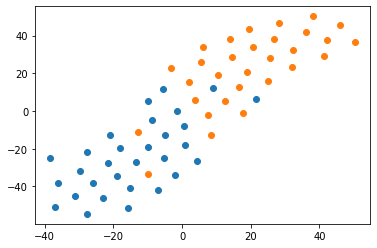

In [13]:
import matplotlib.pyplot as plt
print(orig_tsne.shape)


plt.scatter(orig_tsne[:nb_points,0], orig_tsne[:nb_points,1])
plt.scatter(orig_tsne[nb_points:,0], orig_tsne[nb_points:,1])
plt.show()
# TODO: properly plot this with colours, smaller subset of the dataset and then plot also the augmented data

## Aug alone

In [14]:
# do tsne on output orig_x + plot
print(output_aug_x.shape)
from sklearn.manifold import TSNE
n_aug = 9
nb_points = 30
print(aug_y.shape)
pos_idx = np.where(aug_y[:,0] == 1)[0][:nb_points*n_aug]
neg_idx = np.where(aug_y[:,0] == 0)[0][:nb_points*n_aug]
print(np.where(aug_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_aug_x_reduced = []
for idx in idx_reduced:
    output_aug_x_reduced.append(output_aug_x[idx])
    
output_aug_x_reduced = np.array(output_aug_x_reduced)

print(output_aug_x_reduced.shape)

tsne = TSNE(n_components=2, init='random')
aug_tsne =  tsne.fit_transform(output_aug_x_reduced)




(34849, 20)
(34849, 2)
[    0     1     2 ... 34846 34847 34848]
[  14   16   50   66   78   92  111  156  185  246  247  277  294  296
  314  328  331  339  352  357  363  443  449  463  481  482  507  549
  562  583  588  595  597  607  615  617  619  629  687  757  777  804
  808  835  882  908  924  949  953  969  975  985  988  995 1002 1004
 1044 1057 1071 1077 1080 1086 1096 1125 1144 1159 1177 1179 1213 1228
 1249 1263 1267 1297 1307 1342 1347 1356 1406 1427 1439 1465 1478 1483
 1519 1535 1551 1561 1563 1564 1571 1576 1605 1624 1652 1658 1661 1667
 1738 1744 1756 1765 1773 1780 1807 1809 1837 1847 1873 1925 1933 1959
 1977 2050 2072 2112 2116 2121 2124 2127 2133 2151 2191 2202 2205 2233
 2237 2247 2263 2284 2296 2342 2355 2382 2384 2420 2445 2459 2476 2505
 2538 2547 2549 2560 2562 2567 2588 2596 2648 2673 2703 2740 2833 2840
 2851 2923 2947 2966 2974 2996 3043 3084 3092 3115 3116 3128 3133 3156
 3177 3185 3201 3227 3229 3280 3293 3309 3319 3351 3362 3403 3414 3415
 3417 3443 3

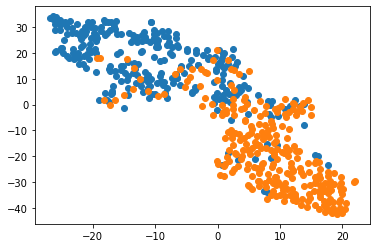

In [15]:
plt.scatter(aug_tsne[:nb_points*n_aug,0], aug_tsne[:nb_points*n_aug,1])
plt.scatter(aug_tsne[nb_points*n_aug:,0], aug_tsne[nb_points*n_aug:,1])
plt.show()

## Aug and Test

In [25]:
# do tsne on output orig_x + plot
print(output_aug_x.shape)
from sklearn.manifold import TSNE

n_aug = 9
nb_points = 30
print(aug_y.shape)
pos_idx = np.where(aug_y[:,0] == 1)[0][:nb_points*n_aug]
neg_idx = np.where(aug_y[:,0] == 0)[0][:nb_points*n_aug]
print(np.where(aug_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_aug_x_reduced = []
for idx in idx_reduced:
    output_aug_x_reduced.append(output_aug_x[idx])
    
output_aug_x_reduced = np.array(output_aug_x_reduced)

print(output_aug_x_reduced.shape)


pos_idx = np.where(orig_y[:,0] == 1)[0][:nb_points]
neg_idx = np.where(orig_y[:,0] == 0)[0][:nb_points]
print(np.where(orig_y == 1)[0])
idx_reduced = np.concatenate((pos_idx, neg_idx))
print(idx_reduced)
output_orig_x_reduced = []
for idx in idx_reduced:
    output_orig_x_reduced.append(output_orig_x[idx])
    
output_orig_x_reduced = np.array(output_orig_x_reduced)

print(output_orig_x_reduced.shape)

output_combined_x_reduced = np.concatenate((output_orig_x_reduced, output_aug_x_reduced))
print(output_combined_x_reduced.shape)


tsne = TSNE(n_components=2, init='random')
combined_tsne =  tsne.fit_transform(output_combined_x_reduced)





(34849, 20)
(34849, 2)
[    0     1     2 ... 34846 34847 34848]
[  14   16   50   66   78   92  111  156  185  246  247  277  294  296
  314  328  331  339  352  357  363  443  449  463  481  482  507  549
  562  583  588  595  597  607  615  617  619  629  687  757  777  804
  808  835  882  908  924  949  953  969  975  985  988  995 1002 1004
 1044 1057 1071 1077 1080 1086 1096 1125 1144 1159 1177 1179 1213 1228
 1249 1263 1267 1297 1307 1342 1347 1356 1406 1427 1439 1465 1478 1483
 1519 1535 1551 1561 1563 1564 1571 1576 1605 1624 1652 1658 1661 1667
 1738 1744 1756 1765 1773 1780 1807 1809 1837 1847 1873 1925 1933 1959
 1977 2050 2072 2112 2116 2121 2124 2127 2133 2151 2191 2202 2205 2233
 2237 2247 2263 2284 2296 2342 2355 2382 2384 2420 2445 2459 2476 2505
 2538 2547 2549 2560 2562 2567 2588 2596 2648 2673 2703 2740 2833 2840
 2851 2923 2947 2966 2974 2996 3043 3084 3092 3115 3116 3128 3133 3156
 3177 3185 3201 3227 3229 3280 3293 3309 3319 3351 3362 3403 3414 3415
 3417 3443 3

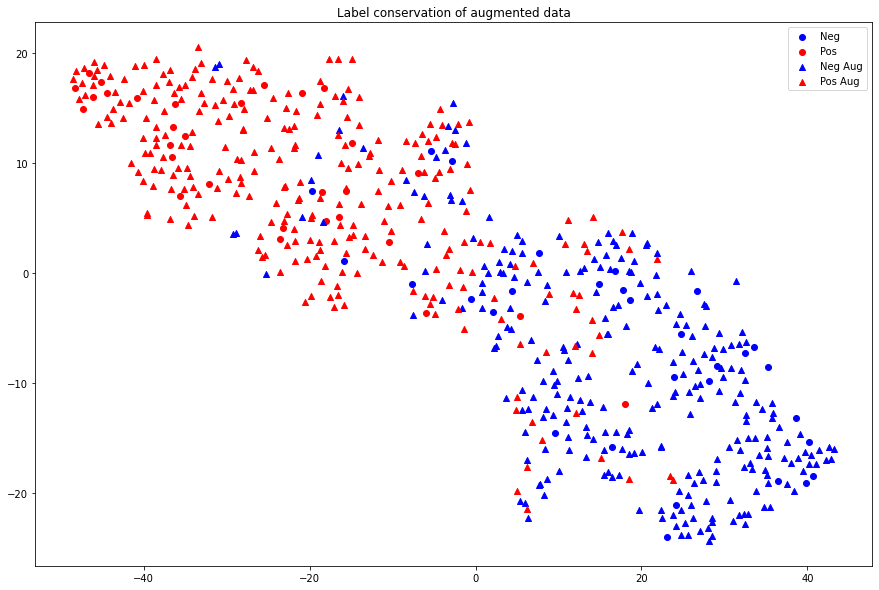

In [26]:
plt.figure(figsize=(15,10))
plt.title("Label conservation of augmented data")
plt.scatter(combined_tsne[:nb_points,0], combined_tsne[:nb_points,1], color="b", label="Neg")
plt.scatter(combined_tsne[nb_points:nb_points*2,0], combined_tsne[nb_points:nb_points*2,1], color ="r", label="Pos")
plt.scatter(combined_tsne[nb_points*2:nb_points*(n_aug+2),0], combined_tsne[nb_points*2:nb_points*(n_aug+2),1], marker='^', color="b", label="Neg Aug")
plt.scatter(combined_tsne[nb_points*(n_aug+2):,0], combined_tsne[nb_points*(n_aug+2):,1],marker='^', color="r", label="Pos Aug" )
plt.legend()
plt.show()